In [2]:
from utils.data import Data
from scipy.stats.mstats import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = Data().get300K()

set index
time to load 3.04


/home/mutaz/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
describe(df1.IE)

DescribeResult(nobs=array(296835), minmax=(masked_array(data=-0.69804603,
             mask=False,
       fill_value=1e+20), masked_array(data=-0.12786034,
             mask=False,
       fill_value=1e+20)), mean=-0.3609227211168697, variance=0.005273676604003219, skewness=masked_array(data=-0.35676225,
             mask=False,
       fill_value=1e+20), kurtosis=-0.5282610681948419)

In [6]:
quantiles = mquantiles(df1.IE)
print(f'25% {quantiles[0]}\n'
     f'50% {quantiles[1]}\n'
     f'75% {quantiles[2]}')

25% -0.414187119
50% -0.354329385
75% -0.30058600360000004


In [59]:
df1.IE.mean()
df1.IE.median()

-0.354329385

In [38]:
type(df1.IE.to_numpy())
df1.IE.quantile(.5)

-0.354329385

In [4]:
quantiles = df1[['IE','C33']].quantile([.05,.5,.95])
#quantiles.loc[:,['IE']]
quantiles

,IE,C33
0.05,-0.486638,18.804149
0.50,-0.354329,34.961394
0.95,-0.259683,69.079689


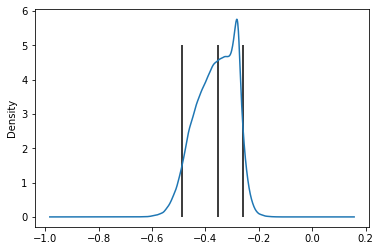

In [56]:
df1.IE.plot.density()
#plt.vlines(df1.IE.quantile(.5),0,1)
#plt.vlines(df1.IE.quantile(.9),0,1)
plt.vlines(quantiles.loc[:,['IE']],0,5)

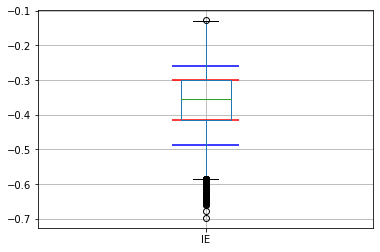

In [76]:
df1.boxplot(['IE'])
plt.hlines( df1[['IE']].quantile([.05,.25,.75,.95]),.9,1.1, colors=['b','r','r','b'])

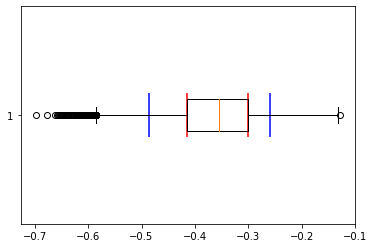

In [77]:
plt.boxplot(df1.IE, vert=False)
plt.vlines( df1[['IE']].quantile([.05,.25,.75,.95]),.9,1.1, colors=['b','r','r','b'])

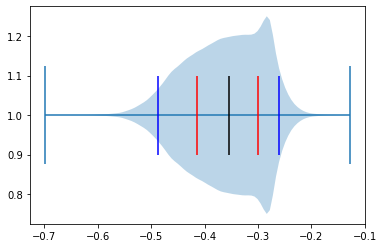

In [84]:
plt.violinplot(df1.IE, vert=False)
plt.vlines( df1[['IE']].quantile([.05,.25,.5,.75,.95]),.9,1.1, colors=['b','r','k','r','b'])

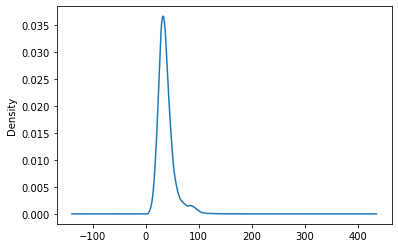

In [24]:
df1.C.plot.density()

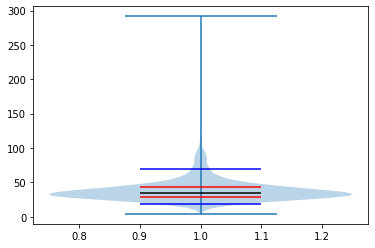

In [80]:
plt.violinplot(df1.C33)
plt.hlines( df1[['C33']].quantile([.05,.25,.5,.75,.95]),.9,1.1, colors=['b','r','k','r','b'])

# 18M

In [9]:
df2 = Data().get18M()

set index
time to load 244.81


In [10]:
quantiles2 = df2[['IE','C33']].quantile([.05,.5,.95])
#quantiles.loc[:,['IE']]
quantiles2

,IE,C33
0.05,-0.517409,19.446747
0.50,-0.388903,34.864929
0.95,-0.283269,63.447675


# 300k AND 18m QUANTILES

In [5]:
quantiles

,IE,C33
0.05,-0.486638,18.804149
0.50,-0.354329,34.961394
0.95,-0.259683,69.079689


In [20]:
q_concat = pd.concat([quantiles, quantiles2], axis=1, keys=['300K','18M'])

In [21]:
describe_concat = pd.concat([df1[['IE','C33']].describe(), df2[['IE','C33']].describe()], axis=1, keys=['300K','18M'])

In [22]:
summary_stats = pd.concat([q_concat, describe_concat])

In [28]:
summary_stats.drop(['count'])

300K                   18M            
            IE         C33        IE         C33
0.05 -0.486638   18.804149 -0.517409   19.446747
0.5  -0.354329   34.961394 -0.388903   34.864929
0.95 -0.259683   69.079689 -0.283269   63.447675
mean -0.360923   37.836763 -0.393355   37.557312
std   0.072620   15.910497  0.073606   15.649279
min  -0.698046    4.040306 -1.113122    3.969064
25%  -0.414187   28.031363 -0.445698   28.284822
50%  -0.354329   34.961394 -0.388903   34.864929
75%  -0.300587   43.586918 -0.336262   43.098805
max  -0.127860  291.645269 -0.185992  336.563044